In [1]:
import collections
import pathlib

# データ処理周り
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>")) 

# 可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import cm # colormap
import seaborn as sns
%matplotlib inline

# pandasのwarningが邪魔なので
import warnings
warnings.filterwarnings('ignore')

# options
# pd.set_option('display.max_columns', 50)
plt.style.use('ggplot')

## 2-1 学習データの確認

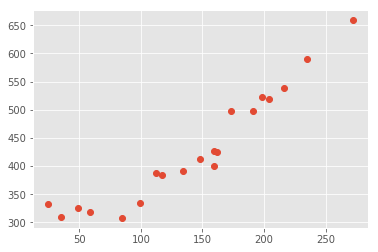

In [2]:
train=pd.read_csv('../input/click.csv')
train_x=train["x"]
train_y=train["y"]
plt.plot(train_x,train_y,"o")
plt.show()

## 2-2 1次関数として実装

In [3]:
#乱数を固定
SEED=2018
np.random.seed(SEED)
#パラメータを初期化
theta0=np.random.rand()
theta1=np.random.rand()
#予測関数 
def f(x):
    return theta0 + theta1 * x
#目的関数 最小二乗法
def E(x,y):
    return 0.5 * np.sum((y-f(x)) ** 2)

## 2-3 インタラクティブシェルで実行

In [4]:
#標準化
mu=train_x.mean()
sigma=train_x.std()
def standardize(x):
    return (x-mu) / sigma
train_z=standardize(train_x)

## 2-4 インタラクティブシェルで実行

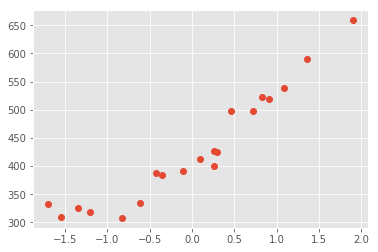

In [5]:
plt.plot(train_z,train_y,"o")
plt.show()

## 2-5

In [6]:
# 学習率
ETA=1e-3

#誤差の微分
diff=1

#更新回数
count=0

#学習を繰り返す
error=E(train_z,train_y)

while diff > 1e-2 :
    #更新結果を一時変数に保存
    tmp0=theta0 -ETA *np.sum((f(train_z)-train_y))
    tmp1=theta1 -ETA *np.sum((f(train_z)-train_y)*train_z)
    #パラメータの更新
    
    theta0=tmp0
    theta1=tmp1
    
    #前回の誤差との差分を計算
    current_error=E(train_z,train_y)
    diff=error-current_error
    error=current_error
    
    #ログの出力
    count+=1
    log='{}回目: theta0= {:.3f},theta1= {:.3f},差分={:.4f}'
    print(log.format(count,theta0,theta1,diff))

1回目: theta0= 9.448,theta1= 1.925,差分=75913.4691
2回目: theta0= 17.842,theta1= 3.710,差分=72913.7314
3回目: theta0= 26.068,theta1= 5.462,差分=70032.5411
4回目: theta0= 34.130,theta1= 7.180,差分=67265.2129
5回目: theta0= 42.030,theta1= 8.866,差分=64607.2465
6回目: theta0= 49.772,theta1= 10.520,差分=62054.3196
7回目: theta0= 57.360,theta1= 12.142,差分=59602.2809
8回目: theta0= 64.796,theta1= 13.734,差分=57247.1430
9回目: theta0= 72.083,theta1= 15.295,差分=54985.0761
10回目: theta0= 79.224,theta1= 16.827,差分=52812.4019
11回目: theta0= 86.223,theta1= 18.329,差分=50725.5873
12回目: theta0= 93.081,theta1= 19.803,差分=48721.2391
13回目: theta0= 99.803,theta1= 21.249,差分=46796.0981
14回目: theta0= 106.390,theta1= 22.668,差分=44947.0338
15回目: theta0= 112.845,theta1= 24.059,差分=43171.0396
16回目: theta0= 119.171,theta1= 25.424,差分=41465.2276
17回目: theta0= 125.370,theta1= 26.764,差分=39826.8242
18回目: theta0= 131.446,theta1= 28.077,差分=38253.1654
19回目: theta0= 137.400,theta1= 29.366,差分=36741.6924
20回目: theta0= 143.235,theta1= 30.630,差分=35289.9475
21回目: th

305回目: theta0= 428.247,theta1= 95.631,差分=0.3644
306回目: theta0= 428.265,theta1= 95.637,差分=0.3501
307回目: theta0= 428.283,theta1= 95.642,差分=0.3362
308回目: theta0= 428.300,theta1= 95.647,差分=0.3230
309回目: theta0= 428.317,theta1= 95.652,差分=0.3102
310回目: theta0= 428.334,theta1= 95.657,差分=0.2980
311回目: theta0= 428.350,theta1= 95.661,差分=0.2862
312回目: theta0= 428.366,theta1= 95.666,差分=0.2750
313回目: theta0= 428.382,theta1= 95.671,差分=0.2641
314回目: theta0= 428.397,theta1= 95.675,差分=0.2537
315回目: theta0= 428.412,theta1= 95.680,差分=0.2437
316回目: theta0= 428.427,theta1= 95.684,差分=0.2341
317回目: theta0= 428.441,theta1= 95.688,差分=0.2248
318回目: theta0= 428.456,theta1= 95.692,差分=0.2160
319回目: theta0= 428.469,theta1= 95.696,差分=0.2075
320回目: theta0= 428.483,theta1= 95.700,差分=0.1993
321回目: theta0= 428.496,theta1= 95.704,差分=0.1914
322回目: theta0= 428.510,theta1= 95.708,差分=0.1839
323回目: theta0= 428.522,theta1= 95.712,差分=0.1766
324回目: theta0= 428.535,theta1= 95.716,差分=0.1696
325回目: theta0= 428.547,theta1= 95.719,差分

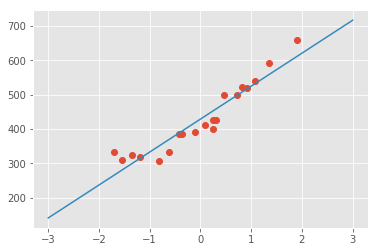

In [7]:
x=np.linspace(-3,3,100)
plt.plot(train_z,train_y,"o")
plt.plot(x,f(x))
plt.show()

## 2-3検証

In [8]:
print(f(standardize(100)))
print(f(standardize(200)))
print(f(standardize(300)))

370.97990668483266
510.45955430964017
649.9392019344477


## 2-4多項式回帰の実装

In [9]:
np.random.seed(SEED)
#パラメータを初期化
theta=np.random.rand(3)
#学習データの行列を作る
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]),x,x**2]).T

X=to_matrix(train_z)

#予測関数
def f(x):
    return np.dot(x,theta)

#差分の更新
diff=1
#学習を繰り返す
error=E(X,train_y)
while diff > 1e-2:
    #パラメータを更新
    theta = theta - ETA * np.dot(f(X)-train_y,X)
    #前回の誤差との差分を更新
    current_error= E(X,train_y)
    diff = error - current_error
    error = current_error

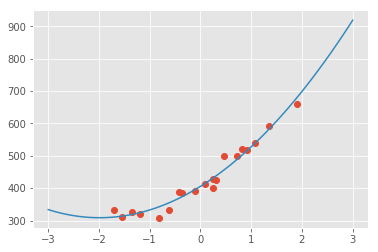

In [10]:
x=np.linspace(-3,3,100)
plt.plot(train_z,train_y,"o")
plt.plot(x,f(to_matrix(x)))
plt.show()

## 2-11.平均二乗誤差

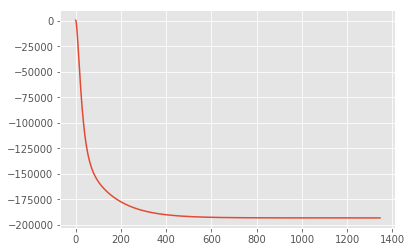

In [12]:
#平均二乗誤差
def MSE(x,y):
    return (1/ x.shape[0]) * np.sum(y-f(x) ** 2)
#パラメータをランダムに初期化
np.random.seed(SEED)
theta = np.random.rand(3)
#平均二乗誤差の履歴
errors=[]

#誤差の差分
diff = 1
#学習を繰り返す
errors.append(MSE(X,train_y))

while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X)-train_y,X)
    errors.append(MSE(X,train_y))
    diff = errors[-2] - errors[-1]
#誤差のプロット
x=np.arange(len(errors))
plt.plot(x,errors)
plt.show()

## 2-12.確率的勾配降下法の実装

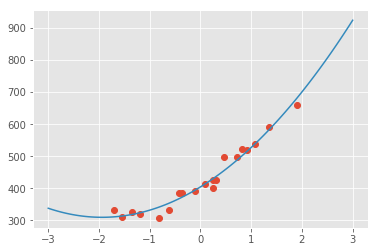

In [20]:
#パラメータをランダムに初期化
np.random.seed(SEED+1)
theta = np.random.rand(3)
#平均二乗誤差の履歴
errors=[]
 
#誤差の差分
diff = 1
#学習を繰り返す
errors.append(MSE(X,train_y))

while diff > 1e-2:
    #学習データを並べ替えるためにランダムな順列を用意する
    p=np.random.permutation(X.shape[0])
    #学習データをランダムに取り出して確率的勾配降下法でパラメータを更新
    for x,y in zip(X[p,:],train_y[p]):
        theta = theta - ETA * (f(x)-y)* x
    errors.append(MSE(X,train_y))
    diff = errors[-2] - errors[-1]
#誤差のプロット
x=np.linspace(-3,3,100)
plt.plot(train_z,train_y,"o")
plt.plot(x,f(to_matrix(x)))
plt.show()